In [ ]:
"""
histogram
bar plot

Visualization
Covaraince/correlation
normalization
binning
sampling


HW: 
Simulate 
prob distribution
"""

In [1]:
import os
os.path.abspath(os.getcwd())

'C:\\Users\\shihyuch\\CoursesSourceCode\\ML'

## Data description

In [1]:
import pandas as pd  
  
# importing regex module 
import re 
    
# making data frame  
data = pd.read_csv("NBA.csv")  
    
# removing null values to avoid errors  
data.dropna(inplace = True)  
  
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = data.describe(percentiles = perc, include = include) 
  
# display 
desc 

,Name,Team,Position,Height,College,Salary
count,364,364,364,364,364,3.640000e+02
unique,364,30,5,17,115,NaN
top,Tim Duncan,New Orleans Pelicans,SG,9-Jun,Kentucky,NaN
freq,1,16,87,49,22,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.620311e+06
std,NaN,NaN,NaN,NaN,NaN,5.119716e+06
min,NaN,NaN,NaN,NaN,NaN,5.572200e+04
20%,NaN,NaN,NaN,NaN,NaN,9.472760e+05
40%,NaN,NaN,NaN,NaN,NaN,1.638754e+06
50%,NaN,NaN,NaN,NaN,NaN,2.515440e+06


In [4]:
    
# removing null values to avoid errors  
data.dropna(inplace = True)  
  
# calling describe method 
desc = data["Salary"].describe() 
  
# display 
desc 


count    3.640000e+02
mean     4.620311e+06
std      5.119716e+06
min      5.572200e+04
25%      1.000000e+06
50%      2.515440e+06
75%      6.149694e+06
max      2.287500e+07
Name: Salary, dtype: float64

## Histogram

In [2]:
# Histograms in Pure Python
a =  (0, 1, 1, 1, 2, 3, 7, 7, 23)

def count_elements(seq):
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
        
    return hist

counted = count_elements(a)

counted




{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [3]:
# Histogram Calculations in NumPy
import numpy as np
# `numpy.random` uses its own PRNG.
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]


array([18.406, 18.087, 16.004, 16.221,  7.358])

(0.0, 80.0)

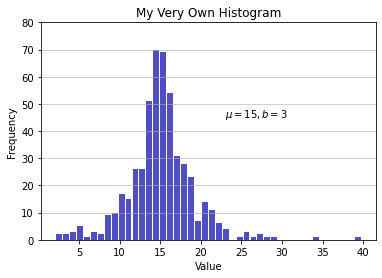

In [4]:
# histogram visualization
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


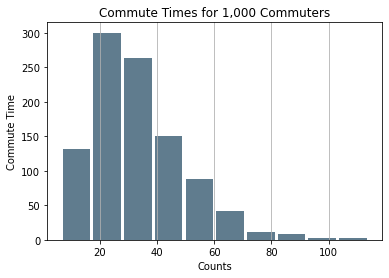

In [7]:
# Series data
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)


## Bar Plot

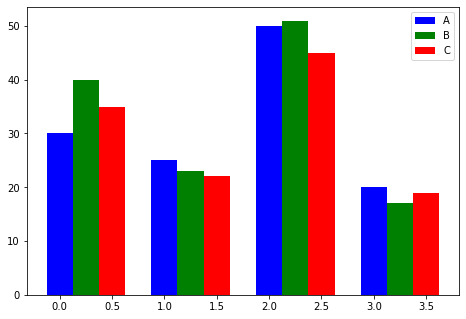

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['A', 'B', 'C'])

<ipython-input-7-231f64133f02>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))


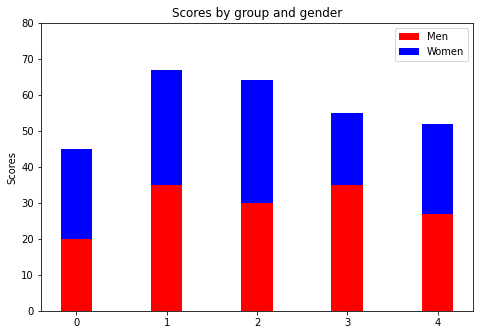

In [7]:
"""
Stacking
"""
import numpy as np
import matplotlib.pyplot as plt
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()



## Covariance and Correlation

In [8]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)
print('unbiased: ')
print(sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / (len(x) - 1))
print(np.cov(x,y))

print('biased: ')
print(sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / (len(x)))
print(np.cov(x,y, bias=True))
# https://towardsdatascience.com/why-sample-variance-is-divided-by-n-1-89821b83ef6d

unbiased: 
2.5
[[2.5 2.5]
 [2.5 2.5]]
biased: 
2.0
[[2. 2.]
 [2. 2.]]


In [9]:

# Python code to demonstrate the  
# use of numpy.cov 
import numpy as np 
  
x = [1.23, 2.12, 3.34, 4.5] 
  
y = [2.56, 2.89, 3.76, 3.95] 
  
# find out covariance with respect  rows 
cov_mat = np.stack((x, y), axis = 1)  
print(cov_mat)
print("shape of matrix x and y:", np.shape(cov_mat)) 
  
print("shape of covariance matrix:", np.shape(np.cov(cov_mat))) 
  
print(np.cov(cov_mat)) 


[[1.23 2.56]
 [2.12 2.89]
 [3.34 3.76]
 [4.5  3.95]]
shape of matrix x and y: (4, 2)
shape of covariance matrix: (4, 4)
[[ 0.884  0.512  0.279 -0.366]
 [ 0.512  0.296  0.162 -0.212]
 [ 0.279  0.162  0.088 -0.115]
 [-0.366 -0.212 -0.115  0.151]]


## Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

print(scaler.data_max_)

print(scaler.transform(data))

print(scaler.transform([[2, 2]]))


MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[1.5 0. ]]


In [11]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

print(scaler.mean_)

print(scaler.transform(data))




print(scaler.transform([[2, 2]]))

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = [[1,30,295],[2,95,890],[3,31,406],\
        [5,32,293],[6,76,651]]
scaler = MinMaxScaler()
# print(scaler.fit(data))
# print(scaler.mean_)
scaled = scaler.fit_transform(data)
print(scaled)
# print(data[:,1].mean())
# print(data[:,1].var())
print(scaled[:,2].mean())
print(scaled[:,2].var())

[[0.    0.    0.003]
 [0.2   1.    1.   ]
 [0.4   0.015 0.189]
 [0.8   0.031 0.   ]
 [1.    0.708 0.6  ]]
0.35845896147403683
0.1505944013759473


In [13]:
df = pd.DataFrame(data,columns=['att 1', 'att 2', 'att 3'])
print(df.cov())
df.corr()


       att 1    att 2     att 3
att 1   4.30     7.85     11.25
att 2   7.85   936.70   7747.50
att 3  11.25  7747.50  67091.50


,att 1,att 2,att 3
att 1,1.000000,0.123690,0.020945
att 2,0.123690,1.000000,0.977299
att 3,0.020945,0.977299,1.000000


In [14]:
p = 1.5
# 1/4,1/2,2/3
value = 1/2
Mink = (value**p + value**p)**(1/p)
Mink

0.7937005259840998

## Bin

In [ ]:

"""
https://pbpython.com/pandas-qcut-cut.html
"""